![Used car prediction](https://miro.medium.com/v2/resize:fit:828/format:webp/1*ZOcUPrSXLYucFxppoI-dYg.png)
### 1. Libraries & ToolKits
### 2. Importing Dataset and Exploration
### 3. Exploratory Data Analysis (EDA)
### 4. Data Preprocessing and Feature Engineering
### 5. Feature Selection
### 6. Modeling
### 7. Model Evaluation and Saving


# 1) Libraries & Toolkits
### Import essential libraries for data analysis, model building, and evaluation

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

import warnings
import joblib

# Settings
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})


ModuleNotFoundError: No module named 'xgboost'

* Numpy: For numerical operations.
* Matplotlib & Seaborn: For data visualization.
* Pandas: For data manipulation and analysis.
* Scikit-learn: For machine learning model building and evaluation.
* Joblib: For saving the trained model.

# 2) Importing Dataset and exploration

In [ ]:
# Load the dataset
df = pd.read_csv('Cars.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Overview of the dataset
print(df.shape)
df.sample(10)

(14741, 11)


,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
11868,Fiat,Shahin,Sedan,Black,1999,Benzine,More than 200000,1400 - 1500 CC,Manual,33.0,Cairo
382,Hyundai,Accent,Sedan,Black,2011,Benzine,120000 to 139999,1600 CC,Automatic,165.0,Giza
10226,Fiat,128,Sedan,Blue- Navy Blue,1989,Benzine,More than 200000,1000 - 1300 CC,Manual,16.0,Alexandria
12127,Fiat,Uno,Hatchback,Blue- Navy Blue,1998,Benzine,120000 to 139999,1000 - 1300 CC,Manual,45.0,Alexandria
3828,Hyundai,Elantra,Sedan,Blue- Navy Blue,2009,Benzine,10000 to 19999,1600 CC,Automatic,170.2,Fayoum
8710,Chevrolet,Lanos,Sedan,White,2013,Natural Gas,80000 to 89999,1400 - 1500 CC,Manual,86.2,Giza
10863,Fiat,128,Sedan,White,1977,Benzine,90000 to 99999,1000 - 1300 CC,Manual,20.0,Qalyubia
10071,Fiat,128,Sedan,Red,1987,Benzine,90000 to 99999,1000 - 1300 CC,Manual,31.0,Red Sea
3005,Hyundai,Accent,Sedan,Burgundy,2019,Benzine,60000 to 69999,1600 CC,Automatic,224.2,Cairo
13711,Fiat,131,Sedan,Gold,1984,Benzine,10000 to 19999,1600 CC,Manual,31.1,Cairo


In [ ]:
df.Model.unique()

array(['Accent', 'Avante', 'I10', 'Elantra', 'Excel', 'Matrix', 'Tucson',
       'Verna', 'Cruze', 'Aveo', 'Lanos', 'Optra', '128', '131', 'Punto',
       'Shahin', 'Tipo', 'Uno'], dtype=object)

In [28]:
df.Fuel.unique()

array(['Benzine', 'Natural Gas'], dtype=object)

In [29]:
df.Color.unique()

array(['Black', 'Silver', 'Gray', 'Blue- Navy Blue', 'Green', 'Red',
       'Gold', 'Other Color', 'Burgundy', 'White', 'Yellow', 'Brown',
       'Orange', 'Beige'], dtype=object)

In [30]:
df.Gov.unique()

array(['Giza', 'Qena', 'Cairo', 'Minya', 'Alexandria', 'Dakahlia', 'Suez',
       'Sharqia', 'Kafr al-Sheikh', 'Beheira', 'Ismailia', 'Sohag',
       'Monufia', 'Qalyubia', 'Beni Suef', 'Asyut', 'Fayoum', 'Gharbia',
       'Matruh', 'Damietta', 'Red Sea', 'Port Said', 'Luxor',
       'South Sinai', 'New Valley', 'Aswan'], dtype=object)

In [32]:
df.Engine.unique()

array(['1600 CC', '1000 - 1300 CC', '1400 - 1500 CC'], dtype=object)

In [33]:
# Information about the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         14741 non-null  object 
 1   Model         14741 non-null  object 
 2   Body          14741 non-null  object 
 3   Color         14741 non-null  object 
 4   Year          14741 non-null  int64  
 5   Fuel          14741 non-null  object 
 6   Kilometers    14741 non-null  object 
 7   Engine        14741 non-null  object 
 8   Transmission  14741 non-null  object 
 9   Price         14741 non-null  float64
 10  Gov           14741 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.2+ MB


In [34]:
# Count of unique values per column
pd.DataFrame({'Column': df.columns, 'Number of unique values': df.nunique().values})

,Column,Number of unique values
0,Brand,3
1,Model,18
2,Body,3
3,Color,14
4,Year,53
5,Fuel,2
6,Kilometers,16
7,Engine,3
8,Transmission,2
9,Price,631


In [35]:
# Count of cars per brand
df.Brand.value_counts()

Brand
Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: count, dtype: int64

* Load the car dataset from a CSV file.
* Drop unnecessary columns (like 'Unnamed: 0').
* Display the shape, a random sample, and column information to understand the dataset better.
* Check the count of unique values and the distribution of car brands.

# 3) Exploratory Data Analysis (EDA)

Transmission
Manual       9862
Automatic    4879
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_17752\2266209262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Transmission"], y=df["Price"], palette='viridis')


<Axes: xlabel='Transmission', ylabel='Price'>

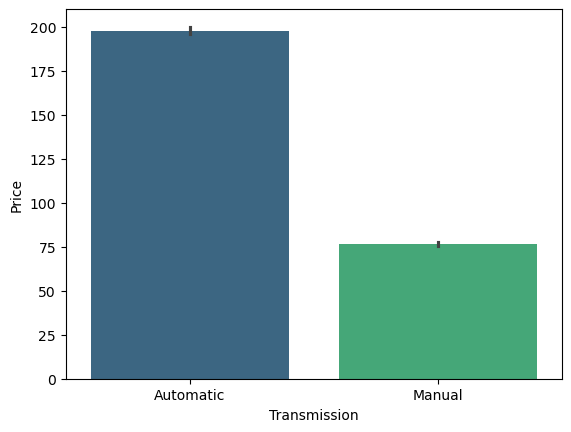

In [36]:
# Analyze categorical variables and their relationship with price

# Transmission type distribution and impact on price
print(df.Transmission.value_counts())
sns.barplot(x=df["Transmission"], y=df["Price"], palette='viridis')

Brand
Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_17752\3622471207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Brand"], y=df["Price"], palette='viridis')


<Axes: xlabel='Brand', ylabel='Price'>

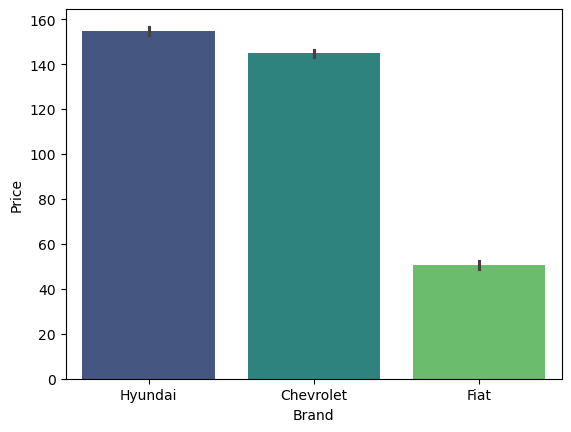

In [37]:
# Car brand distribution and impact on price
print(df.Brand.value_counts())
sns.barplot(x=df["Brand"], y=df["Price"], palette='viridis')

Engine
1600 CC           6762
1400 - 1500 CC    4356
1000 - 1300 CC    3623
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_17752\366999186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Engine"], y=df["Price"], palette='viridis')


<Axes: xlabel='Engine', ylabel='Price'>

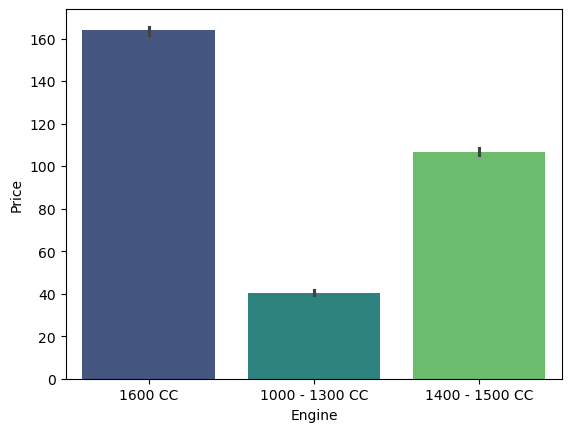

In [38]:
# Engine size distribution and impact on price
print(df.Engine.value_counts())
sns.barplot(x=df["Engine"], y=df["Price"], palette='viridis')

C:\Users\User\AppData\Local\Temp\ipykernel_17752\3816681612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df["Year"], palette='viridis')


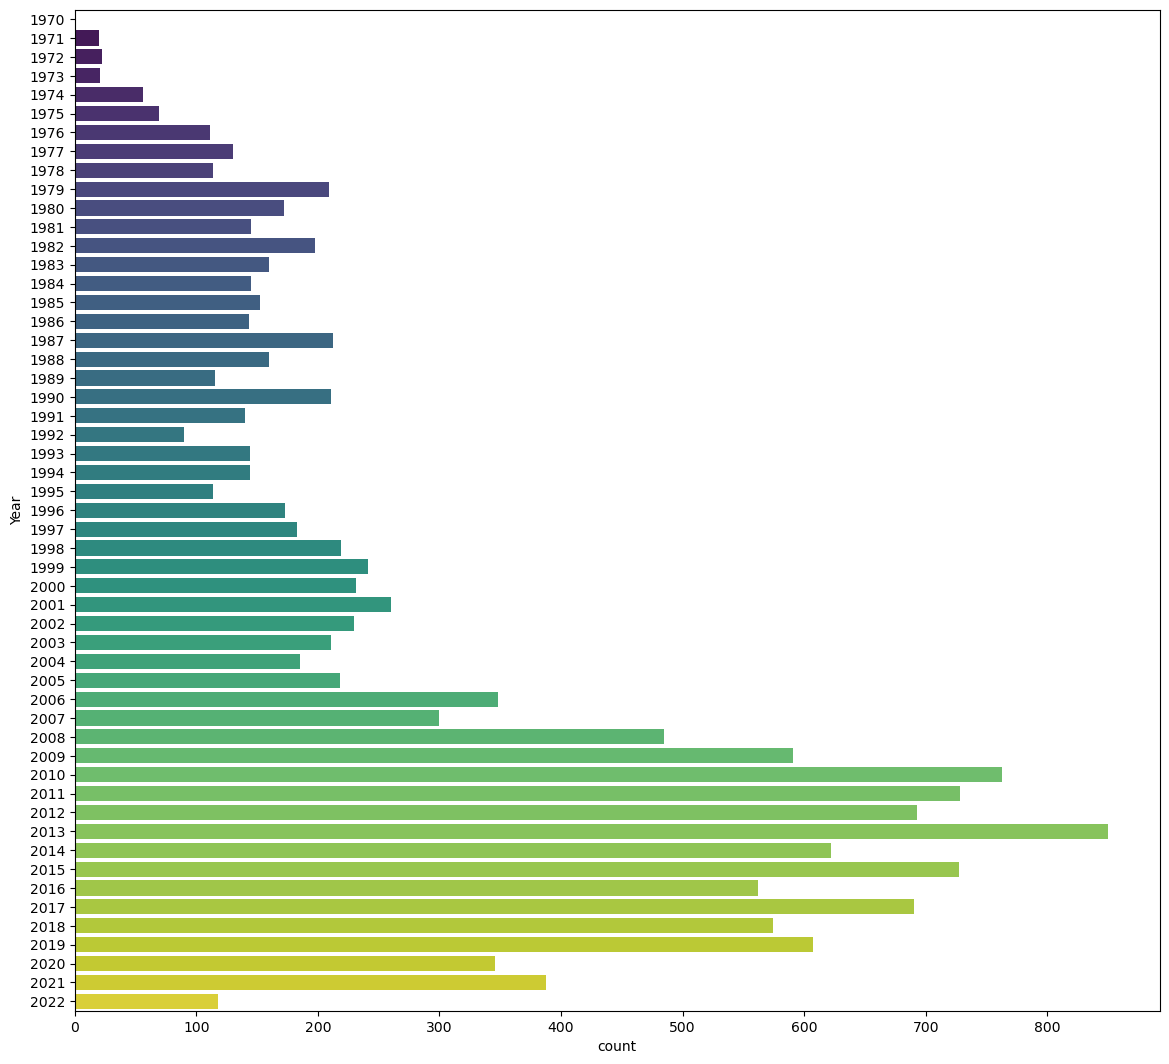

In [39]:
# Distribution of cars by manufacturing year
plt.figure(figsize=(14,13))
ax = sns.countplot(y=df["Year"], palette='viridis')

C:\Users\User\AppData\Local\Temp\ipykernel_17752\3268352920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df["Gov"], palette='viridis')


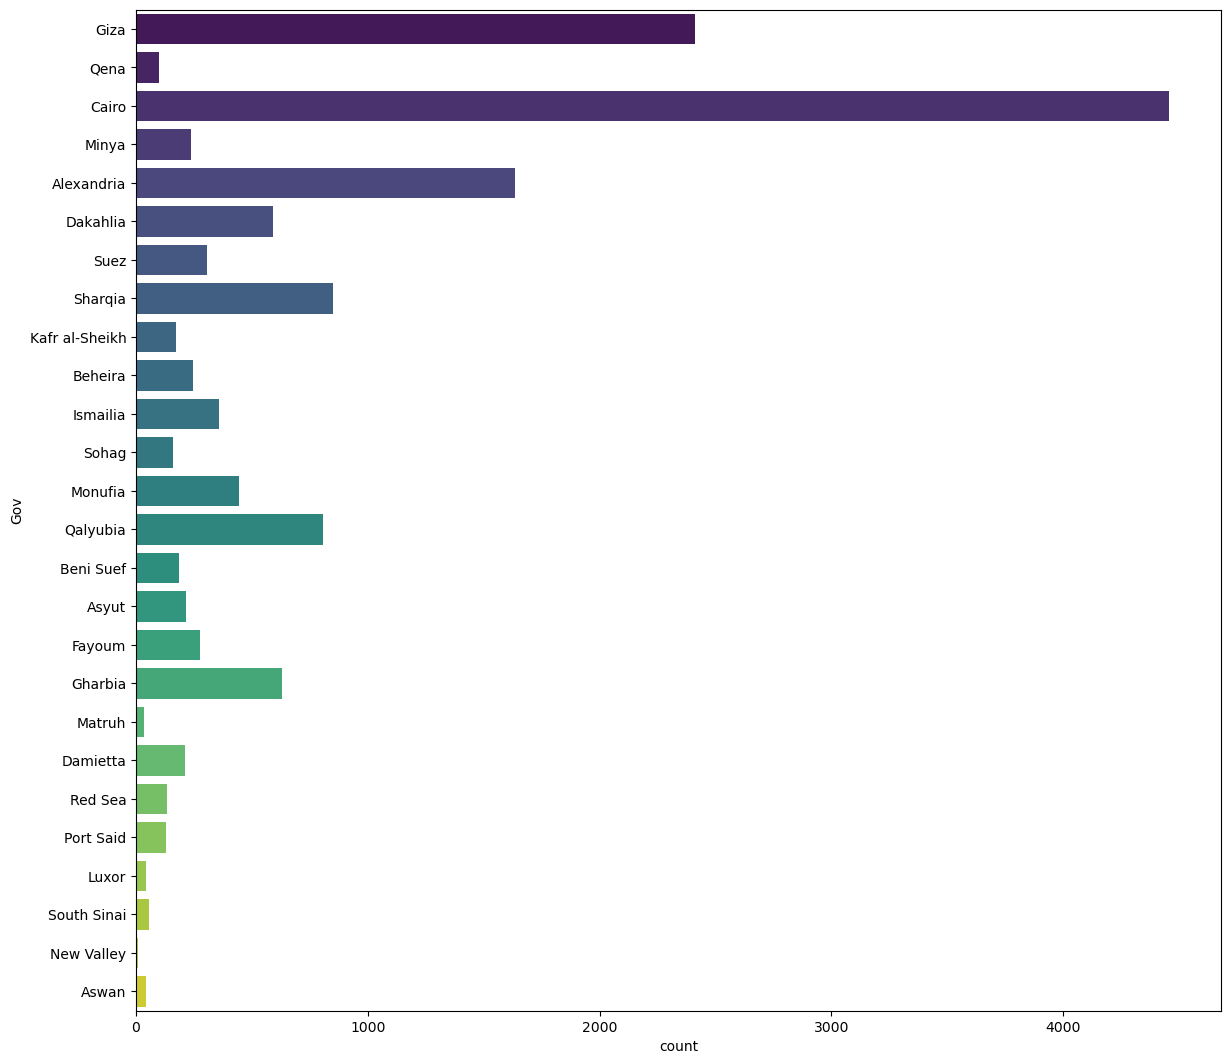

In [40]:
# Distribution of cars by governorate (location)
plt.figure(figsize=(14,13))
ax = sns.countplot(y=df["Gov"], palette='viridis')

* Analyze the distribution of categorical variables (Transmission, Brand, Engine, Year, and Governorate) and their relationship with the car price using bar plots.

# 4) Data Preprocessing and Feature Engineering

In [41]:
# Create a copy of the original data
df_copy = df.copy()

In [42]:
def kilometer_frmt(kilometers):
    if isinstance(kilometers, str):
        if 'to' in kilometers:
            range_values = kilometers.replace(' km', '').replace(',', '').split(' to ')
            kilometers_value = int(range_values[0])
        elif 'More than' in kilometers:
            kilometers_value = int(kilometers.replace('More than ', '').replace(' km', '').replace(',', ''))
        else:
            kilometers_value = int(kilometers.replace(' km', '').replace(',', ''))
    else:
        kilometers_value = kilometers

    return kilometers_value

In [43]:
def engine_size(engine):
    if pd.isna(engine):
        return '0 CC'
    elif '-' in engine:
        return engine
    elif 'CC' in engine:
        return engine.strip()
    else:
        try:
            return f"{float(engine)} CC"
        except ValueError:
            print(f"Unexpected value in 'Engine': {engine}")
            return '0 CC'


In [44]:
def fuel_type(fuel):
    return fuel.strip().lower()
def color_frmt(color):
    return color.strip().lower()
# Convert categorical variables and format features
df_copy.Kilometers = df_copy.Kilometers.apply(kilometer_frmt)
df_copy.Engine = df_copy.Engine.apply(engine_size)
df_copy.Fuel = df_copy.Fuel.apply(fuel_type)
df_copy.Brand = df_copy.Brand.map({'Hyundai': 0, 'Fiat': 1, 'Chevrolet': 2})
df_copy.Body = df_copy.Body.map({'Sedan': 0, 'Hatchback': 1, 'SUV': 2, 'Coupe': 3, 'Cabriolet': 4})
df_copy.Transmission = df_copy.Transmission.map({'Automatic': 1, 'Manual': 0})
df_copy.Color = df_copy.Color.apply(color_frmt)

In [45]:

# Convert categorical features to numerical
nums = []
lbl = LabelEncoder()

for col in df_copy.loc[:, df_copy.dtypes == object].columns: # Change np.object to object
    df_copy[col] = lbl.fit_transform(df_copy[col])
    directory = {label: index for index, label in enumerate(lbl.classes_)}
    nums.append(directory)

* Create a copy of the dataset to avoid modifying the original data.
* Format and convert categorical features into numerical formats for machine learning algorithms.
* Perform feature engineering to create new useful features like "Car Age" and "Owner."

# 5) Feature Selection

In [46]:
# Separate independent and dependent variables
x = df_copy.drop(columns=['Price'])
y = df_copy[['Price']]

<Axes: >

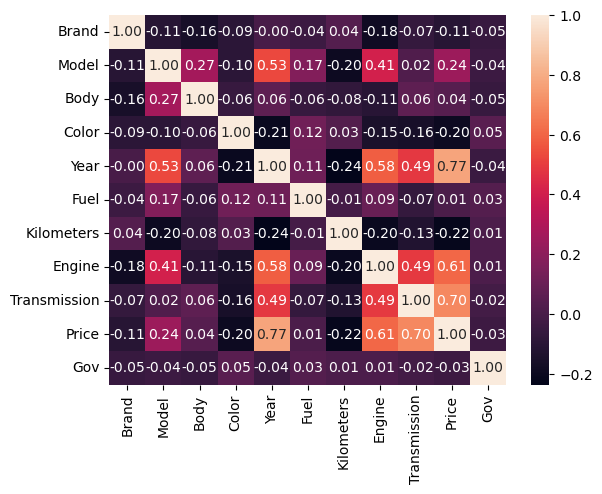

In [47]:
# Display the correlation matrix between variables
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f')

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.06232165 0.05679674 0.01193305 0.02290541 0.27283298 0.00229661
 0.03043504 0.03539798 0.48371315 0.02136739]


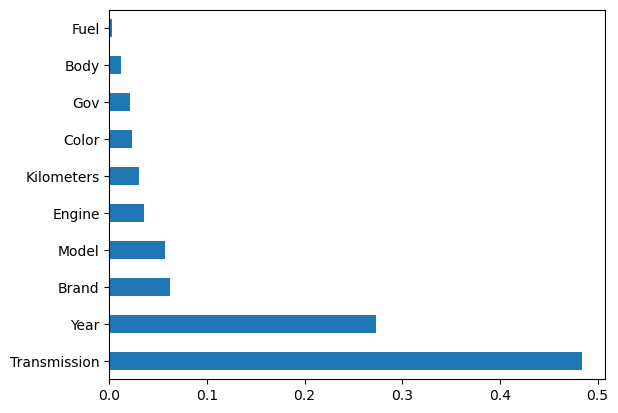

In [48]:
# Use ExtraTreesRegressor to identify important features
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

* Split the data into features (x) and target (y).
* Visualize the correlation between features using a heatmap.
* Use ExtraTreesRegressor to identify the most important features that influence the car price.

# 6)Data Modeling

In [49]:
# Standardize the features
std = StandardScaler()
x = pd.DataFrame(std.fit_transform(x), columns=x.columns)

In [50]:
# Split the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
# Define models to test
models = {
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "XGBRegressor" : XGBRegressor(random_state=42)
}

NameError: name 'XGBRegressor' is not defined

In [ ]:
# Evaluate each model
for name, model in models.items():
    print(f'Model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'R2 Score: {round(r2_score(y_test, y_pred)*100 , 1)} %')
    print('_'*30)

In [ ]:
# Train the best model (XGBRegressor) and evaluate it
best_model = RandomForestRegressor(random_state=42)
best_model.fit(x_train, y_train)
pred = best_model.predict(x_test)
pred

In [ ]:
# Model evaluation
print("Accuracy on Test Data (R2 Score): {:,.1f}".format(best_model.score(x_test , y_test) *100 ) , '%')
print('Mean Absolute Error      : ', mean_absolute_error(y_test, pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, pred))
print('Root Mean Squared  Error: ', np.sqrt(mean_squared_error(y_test, pred)))

# Save the model
joblib.dump(best_model, 'car_price_predictor.pkl')

* Standardize the features for better model performance.
* Split the data into training and testing sets.
* Test different models and evaluate their performance using the R2 Score.
* Choose the best model (XGBRegressor in this case) and evaluate it further using additional metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
* Save the trained model for future use.

## SUMMARY
#### The model achieved a high R2 Score of 92.5%, demonstrating its effectiveness in explaining the variance in used car prices. Additionally, the relatively low MAE (13.36) and RMSE (22.39) values suggest that the model's predictions are accurate, with a small average error. Overall, these results highlight the model's success in predicting used car prices in Egypt.

#### The trained model is saved in the 'car_price_predictor.pkl' file, which can be utilized for future predictions on new car data.

In [ ]:
!pip install streamlit

In [ ]:
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com